In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%matplotlib inline

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Load data
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

## Data Exploration

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleaning

In [4]:
# Check for duplicated entries
sum(train_data.duplicated())

0

## Feature Engineering

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale****

#### Additional features to engineer
* Total square footage or house
* Years since renovation

In [5]:
# Join training and test data sets for feature engineering
train_data['train_test'] = 1
test_data['train_test'] = 0

train_target = train_data.SalePrice

all_data = pd.concat([train_data,test_data])
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop(['Id'], inplace=True, axis=1)
all_data.reset_index()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [6]:
# Look at features missing a lot of missing values: Alley, FireplaceQu, PoolQC, Fence
all_data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [7]:
# Impute Alley missing values with NA = no alley
all_data.Alley.fillna('NA', inplace=True)

In [8]:
# Next, look at FireplaceQu
all_data.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [9]:
# Impute FireplaceQu missing values with NF = no fireplace
all_data.FireplaceQu.fillna('NF', inplace=True)

# Consider further feature engineering with compined Fireplaces/FireplaceQu feature

In [10]:
# Next, look at PoolQC
all_data.PoolQC.value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [11]:
# Impute PoolQC missing values with NP = no pool
all_data.PoolQC.fillna('NP', inplace=True)

# Consider further feature engineering with compined PoolArea/PoolQC feature

In [12]:
# Next, look at Fence
all_data.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [13]:
# Impute Fence missing values with NF = no fence
all_data.Fence.fillna('NF', inplace=True)

In [14]:
all_data = all_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence'], axis=1)
# categorical_columns = categorical_columns.remove('Alley', 'FireplaceQu', 'PoolQC', 'Fence')

In [15]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [16]:
# Add TotalSF feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Add YearsSinceRemodel feature
all_data['YrsSinceRemodel'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Below feature engineering ideas from jesuchristo on Kaggle
# Add Total_Bathrooms feature
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

# Add TotalPorchSF
all_data['TotalPorchSf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

# Add HasPool feature
all_data['HasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# Add Has2ndFloor feature
all_data['Has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# Add HasGarb feature
all_data['HasGarb'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# Add HasBsmt feature
all_data['HasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# Add HasFireplace feature
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Some non-numeric features are stored as numeric, change to strings
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [17]:
# Find numeric and categorical features
numeric_columns = []
categorical_columns = []
for c in all_data.columns:
    if ((all_data[c].dtype != 'int64') & (all_data[c].dtype != 'float64')):
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

In [18]:
# For all other categorical features with missing values, impute mode
for cat in categorical_columns:
    if (sum(all_data[cat].isna()) != 0):
        all_data[cat].fillna(all_data[cat].mode().iloc[0], inplace=True)

In [19]:
# For all numeric features with missing values, impute median
for cat in numeric_columns:
    if (sum(all_data[cat].isna()) != 0):
        all_data[cat].fillna(all_data[cat].mean(), inplace=True)

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       2919 non-null   object 
 1   MSZoning         2919 non-null   object 
 2   LotFrontage      2919 non-null   float64
 3   LotArea          2919 non-null   int64  
 4   Street           2919 non-null   object 
 5   LotShape         2919 non-null   object 
 6   LandContour      2919 non-null   object 
 7   Utilities        2919 non-null   object 
 8   LotConfig        2919 non-null   object 
 9   LandSlope        2919 non-null   object 
 10  Neighborhood     2919 non-null   object 
 11  Condition1       2919 non-null   object 
 12  Condition2       2919 non-null   object 
 13  BldgType         2919 non-null   object 
 14  HouseStyle       2919 non-null   object 
 15  OverallQual      2919 non-null   int64  
 16  OverallCond      2919 non-null   int64  
 17  YearBuilt     

In [21]:
# Dummy encode categorical features, and drop features
all_data = pd.concat([all_data, pd.get_dummies(all_data[categorical_columns])], axis=1)
all_data.drop(categorical_columns, inplace=True, axis=1)

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 314 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(13), int64(30), uint8(271)
memory usage: 1.7 MB


## Feature Selection

In [23]:
# Recover train and test data sets! 
X_train = all_data[all_data.train_test==1].drop(['train_test'], axis=1)
y_train = train_target
X_test = all_data[all_data.train_test==0].drop(['train_test'], axis=1)

# X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'], axis=1)

feature_names = X_train.columns.values

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=feature_names)
feature_importances.sort_values(ascending=False).round(3)

GrLivArea           0.025
TotalSF             0.024
1stFlrSF            0.024
LotArea             0.024
BsmtUnfSF           0.024
                    ...  
RoofMatl_ClyTile    0.000
RoofMatl_Metal      0.000
Utilities_AllPub    0.000
MSSubClass_150      0.000
RoofMatl_Roll       0.000
Length: 313, dtype: float64

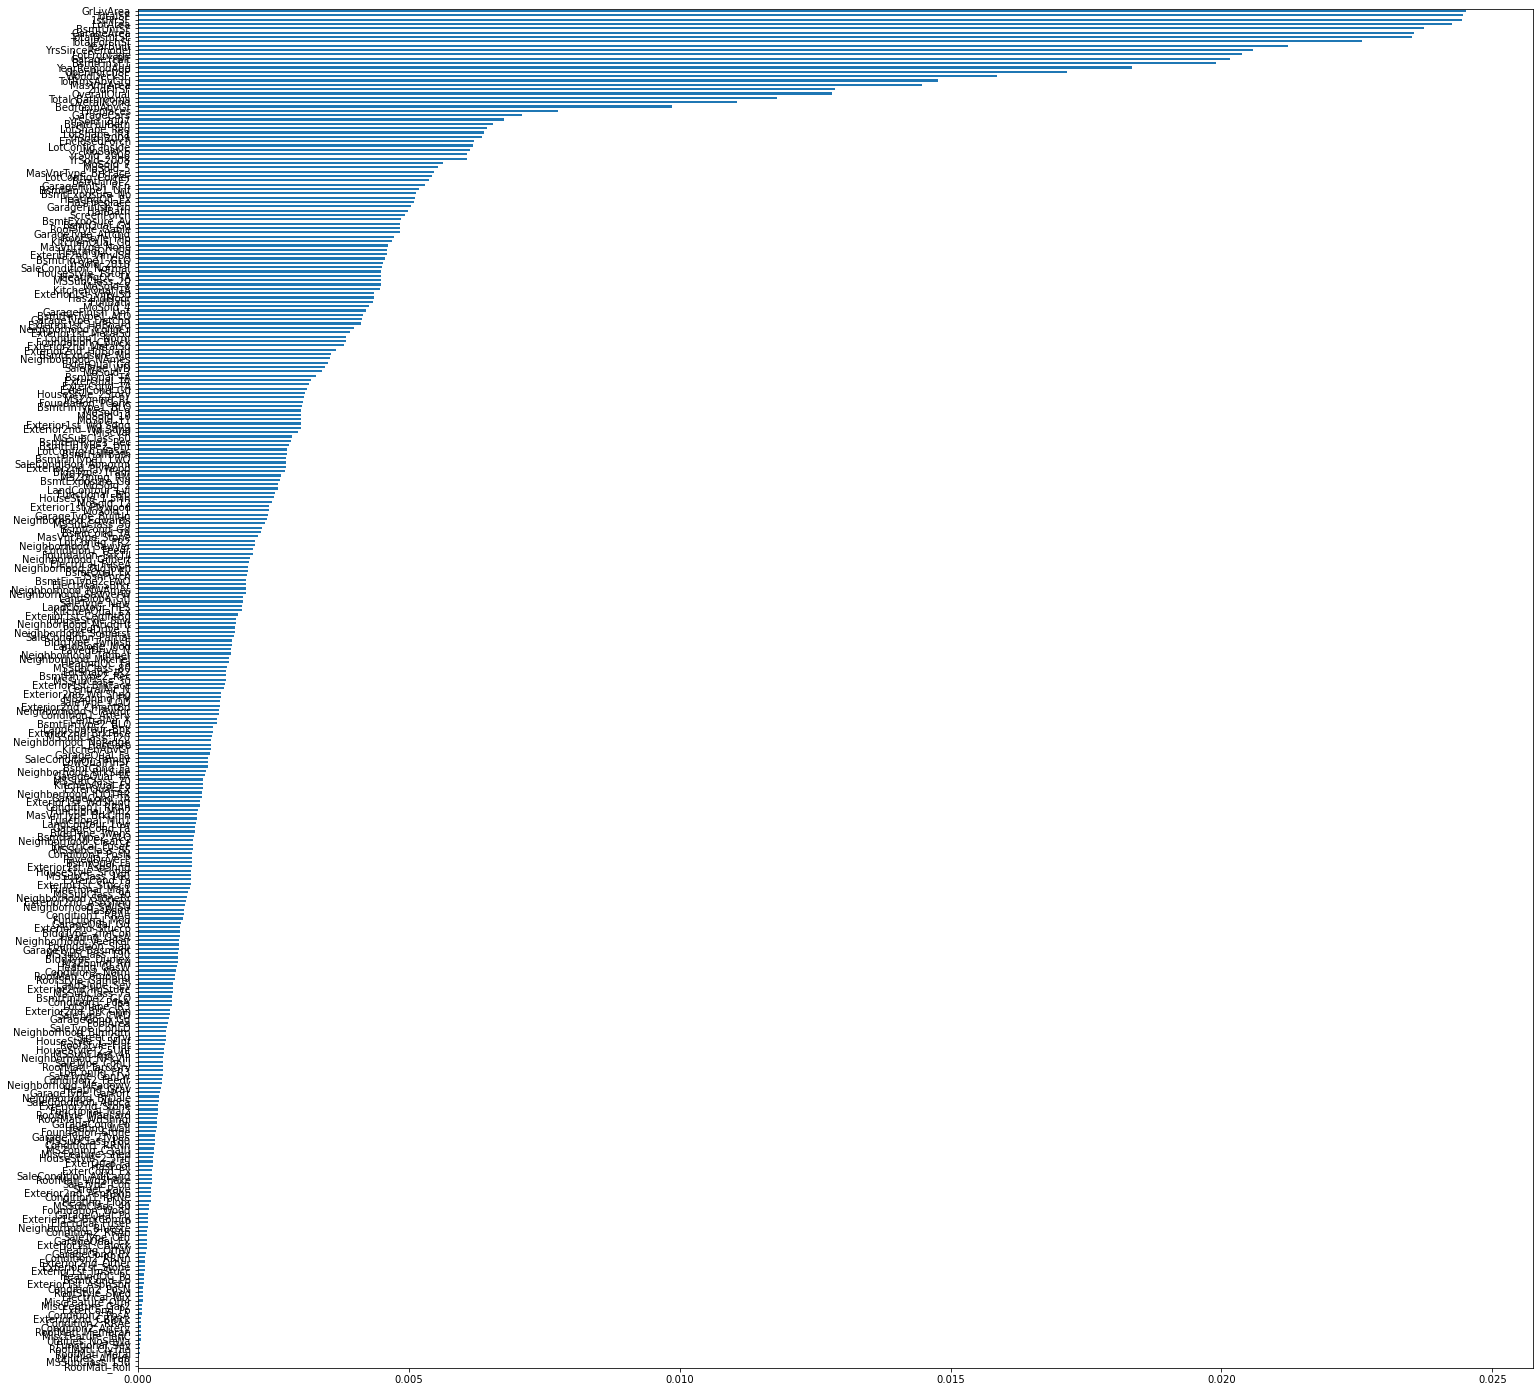

In [25]:
# Plot feature importances in a bar chart
fig, ax = plt.subplots(1, 1, figsize=(25,25))
feature_importances.sort_values().plot.barh(ax=ax)

In [26]:
# Use SelectFromModel to pick features of importance
from sklearn.feature_selection import SelectFromModel

sfm_rf = SelectFromModel(rf, prefit=True, threshold=.006)
X_train_reduced = sfm_rf.transform(X_train)
X_test_reduced = sfm_rf.transform(X_test)

In [27]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)
reduced_features = feature_names[sfm_rf.get_support()]
print(reduced_features)

(1460, 35)
(1459, 35)
['LotFrontage' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtUnfSF' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'BsmtFullBath' 'BedroomAbvGr'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' 'TotalSF' 'YrsSinceRemodel'
 'Total_Bathrooms' 'TotalPorchSf' 'LotShape_IR1' 'LotShape_Reg'
 'LotConfig_Inside' 'MoSold_6' 'YrSold_2006' 'YrSold_2007' 'YrSold_2008'
 'YrSold_2009']


## Scaling Data

In [28]:
# Scale data using StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_reduced_scaled = pd.DataFrame(ss.fit_transform(X_train_reduced),columns=reduced_features)
X_test_reduced_scaled = pd.DataFrame(ss.fit_transform(X_test_reduced),columns=reduced_features)

## Model Building

In [29]:
# Use cross-validation scoring to get sense of model accuracy
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [30]:
# Score model function
def score_model(model, X, y):
    return cross_val_score(model, X, y, cv=5)

rfr = RandomForestRegressor(n_estimators=100, max_depth=5)
knr = KNeighborsRegressor(n_neighbors=10)
lr = LinearRegression()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

In [31]:
print(f'Random Forest Regressor: {np.mean(score_model(rfr, X_train_reduced_scaled, y_train))}')
print(f'K Neighbors Regressor: {np.mean(score_model(knr, X_train_reduced_scaled, y_train))}')
print(f'Linear Regression: {np.mean(score_model(lr, X_train_reduced_scaled, y_train))}')
print(f'Decision Tree Regressor: {np.mean(score_model(dtr, X_train_reduced_scaled, y_train))}')
print(f'Gradient Boosting Regressor: {np.mean(score_model(gbr, X_train_reduced_scaled, y_train))}')
print(f'Support Vector Regressor: {np.mean(score_model(svr, X_train_reduced_scaled, y_train))}')

Random Forest Regressor: 0.8378637393157753
K Neighbors Regressor: 0.7819421015873035
Linear Regression: 0.7730978558241809
Decision Tree Regressor: 0.7446315031411821
Gradient Boosting Regressor: 0.8909348735694183
Support Vector Regressor: -0.050863500685504534


## Hyperparameter Tuning

In [32]:
test_params_rfr=False
if test_params_rfr:
    mean_scores_estimators = []
    for estimators in [250, 200, 100, 50]:
        rfr = RandomForestRegressor(n_estimators=estimators)
        scores = cross_val_score(rfr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_estimators.append( (estimators,scores.mean()) )

    for estimators,mean_score in mean_scores_estimators:
         print(f'{estimators} : {mean_score: 0.3f}')
            
    mean_scores_depth = []
    for depth in [3, 5, 10, 13]:
        rfr = RandomForestRegressor(max_depth=depth)
        scores = cross_val_score(rfr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_depth.append( (depth,scores.mean()) )

    for depth,mean_score in mean_scores_depth:
         print(f'{depth} : {mean_score: 0.3f}')
            
    mean_scores_features = []
    for features in ['sqrt', 'auto', 'log2']:
        rfr = RandomForestRegressor(max_features=features)
        scores = cross_val_score(rfr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_features.append( (features,scores.mean()) )

    for features,mean_score in mean_scores_features:
         print(f'{features} : {mean_score: 0.3f}')
else:
    rfr = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='auto')

In [33]:
test_params_gbr=False
if test_params_gbr:
    mean_scores_estimators = []
    for estimators in [250, 200, 100, 50]:
        gbr = GradientBoostingRegressor(n_estimators=estimators)
        scores = cross_val_score(gbr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_estimators.append( (estimators,scores.mean()) )

    for estimators,mean_score in mean_scores_estimators:
         print(f'{estimators} : {mean_score: 0.3f}')
            
    mean_scores_depth = []
    for depth in [1, 2, 3, 5, 10]:
        gbr = GradientBoostingRegressor(max_depth=depth)
        scores = cross_val_score(gbr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_depth.append( (depth,scores.mean()) )

    for depth,mean_score in mean_scores_depth:
         print(f'{depth} : {mean_score: 0.3f}')
            
    mean_scores_features = []
    for features in ['sqrt', 'auto', 'log2']:
        gbr = GradientBoostingRegressor(max_features=features)
        scores = cross_val_score(gbr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_features.append( (features,scores.mean()) )

    for features,mean_score in mean_scores_features:
         print(f'{features} : {mean_score: 0.3f}')
else:
    gbr = GradientBoostingRegressor(n_estimators=200, max_depth=3, max_features='auto')

In [34]:
test_params_knr=False
if test_params_knr:
    mean_scores_neighbors = []
    for neighbors in [3, 5, 7, 10, 15]:
        knr = KNeighborsRegressor(n_neighbors=neighbors)
        scores = cross_val_score(knr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_neighbors.append( (neighbors,scores.mean()) )

    for neighbors,mean_score in mean_scores_neighbors:
         print(f'{neighbors} : {mean_score: 0.3f}')
            
    mean_scores_p = []
    for p_val in [1,2]:
        knr = KNeighborsRegressor(p=p_val)
        scores = cross_val_score(knr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_p.append( (p_val,scores.mean()) )

    for p_val,mean_score in mean_scores_p:
         print(f'{p_val} : {mean_score: 0.3f}')
            
    mean_scores_leafsize = []
    for leaf in [10, 30, 50]:
        knr = KNeighborsRegressor(leaf_size=leaf)
        scores = cross_val_score(knr,X_train_reduced_scaled,y_train,cv=5)
        mean_scores_leafsize.append( (leaf,scores.mean()) )

    for leaf,mean_score in mean_scores_leafsize:
         print(f'{leaf} : {mean_score: 0.3f}')
else:
    knr = KNeighborsRegressor(n_neighbors=10, p=1, leaf_size=30)

In [35]:
ensemble_models_vr = ([('rfr', rfr), ('gbr', gbr), ('knr', knr)])
ensemble_models_sr = [rfr, gbr, knr]
voting_reg = VotingRegressor(estimators=ensemble_models_vr)
stack_r = StackingRegressor(ensemble_models_sr, LinearRegression())

print(f'Voting Regressor: {np.mean(score_model(voting_reg, X_train_reduced_scaled, y_train))}')
print(f'Stacking Regressor: {np.mean(score_model(stack_r, X_train_reduced_scaled, y_train))}')

Voting Regressor: 0.8731078856963335
Stacking Regressor: 0.8751086871117515


In [36]:
gbr.fit(X_train_reduced_scaled, y_train)
predictions = gbr.predict(X_test_reduced_scaled) 

output = pd.DataFrame({'Id':test_data.Id, 'SalePrice':predictions})
output.to_csv('mysubmission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
